In [2]:
# https://www.ohmsha.co.jp/book/9784274226984/
# nature science model
%config IPCompleter.greedy=True
import sys
import numpy as np
import scipy as sp
import scipy.stats
import sympy as symp
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

# SIR model
```
S : susceptibles 
I : infectives
R : recovered/removed
β : 感染率 > 0
γ : 隔離/回復率 > 0

S*Iの接触回数に応じて感染が広がる＞感受性者数は減る
S(t)´ = -βS(t)I(t) 
I(t)´ = βS(t)I(t) - γI(t)
R(t)´ = γI(t)
```

In [53]:
from scipy.integrate import solve_ivp

def odeSIR(t, y, beta, gamma):
    s = y[0]
    i = y[1]
    dS = -beta*s*i
    dI = beta*s*i - gamma*i
    dR = gamma*i
    return [dS, dI, dR]

beta, gamma = 0.01, 0.5
Tend = 20.0
coef = 5
S0 = coef * gamma / beta # 初期値
I0 = 10
R0 = 0

sol = solve_ivp(fun=odeSIR, t_span=[0, Tend], y0=[S0, I0, R0], args=[beta, gamma], dense_output=True) 

In [54]:
print(sol.y[0].size, sol.y[1].size)
print(sol.y)

19 19
[[2.50000000e+02 2.49992927e+02 2.49921992e+02 2.49191334e+02
  2.39360084e+02 1.99807811e+02 9.70767202e+01 2.78192514e+01
  1.10808119e+01 5.69626020e+00 2.89007648e+00 1.89362044e+00
  1.59401556e+00 1.48346127e+00 1.44424280e+00 1.42972668e+00
  1.42428694e+00 1.42223808e+00 1.42205557e+00]
 [1.00000000e+01 1.00056581e+01 1.00624039e+01 1.06466706e+01
  1.84653356e+01 4.89901323e+01 1.15655562e+02 1.22382961e+02
  9.34940261e+01 6.56429442e+01 3.44216008e+01 1.39279050e+01
  5.58038094e+00 2.08954191e+00 7.88221353e-01 2.97521573e-01
  1.12344400e-01 4.24132381e-02 3.61789285e-02]
 [0.00000000e+00 1.41453995e-03 1.56040283e-02 1.61995335e-01
  2.17458046e+00 1.12020569e+01 4.72677182e+01 1.09797787e+02
  1.55425162e+02 1.88660796e+02 2.22688323e+02 2.44178475e+02
  2.52825604e+02 2.56426997e+02 2.57767536e+02 2.58272752e+02
  2.58463369e+02 2.58535349e+02 2.58541766e+02]]


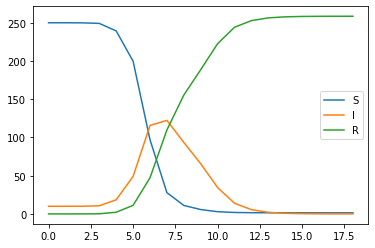

In [55]:
S,I,R = sol.y
plt.plot(S)
plt.plot(I)
plt.plot(R)
plt.legend(['S','I','R'])

# predator/prey model

In [63]:
from scipy.integrate import solve_ivp

def odePre(t, y, a, b, c, d):
    x = y[0]
    y = y[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return [dx, dy]

a, b, c, d = 2, 1, 3, 1
Tend = 20.0
x0, y0 = 10, 2

sol = solve_ivp(fun=odePre, t_span=[0, Tend], y0=[x0, y0], args=[a, b, c, d], dense_output=True) 

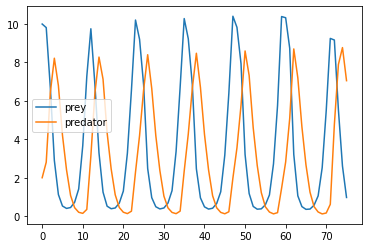

In [64]:
prey, predator = sol.y
plt.plot(prey)
plt.plot(predator)
plt.legend(['prey', 'predator'])

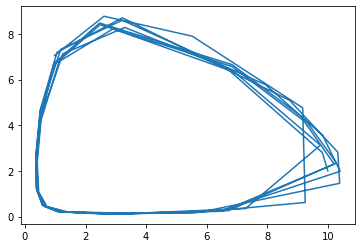

In [66]:
plt.plot(prey, predator) # x, y > 0 において周期解となる

# mandelbrot

In [109]:
def mandelbrot(arr, width, height, xmin, ymin, xmax, ymax, maxIt):
    x_scale = xwidth/np.float64(WIDTH)
    y_scale = ywidth/np.float64(HEIGHT)
    for ky in range(height):
        cy = y_scale*(height-ky) + ymin # Y軸反転
        for kx in range(width):
            cx = x_scale*kx + xmin
            c = complex(cx, cy)
            z = complex(0.0, 0.0)
            flag = True
            for it in range(maxIt):
                count = it
                z = z * z + c # z(n+1) = z(n) * z(n) + C
                if abs(z) >= 2: # 発散条件
                    flag = False
                    break
            color = 1.0 if flag else float(count) / maxIt
            arr[ky, kx] = color

In [110]:
#xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
xmin, xmax, ymin, ymax = 0.1, 0.5, 0.4, 0.8
WIDTH  = 600
HEIGHT = 600

xwidth = xmax - xmin
ywidth = ymax - ymin
maxIt = 64

arr = np.zeros((HEIGHT, WIDTH))
mandelbrot(arr, WIDTH, HEIGHT, xmin, ymin, xmax, ymax, maxIt)

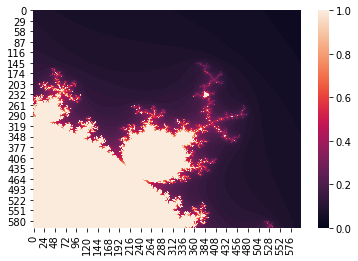

In [111]:
sns.heatmap(arr, vmin = 0, vmax = 1)

# Barnsley fern

In [23]:
# 次の４つのアフィン変換で表される
m = [
    np.array([
        [0, 0], 
        [0, 0.16]
    ]),
    np.array([
        [0.85, 0.04], 
        [-0.04, 0.85]
    ]),
    np.array([
        [0.2, -0.26], 
        [0.23, 0.22]
    ]),
    np.array([
        [-0.15, 0.28], 
        [0.26, 0.24]
    ])
]
t = [
    np.array([0, 0]),
    np.array([0, 1.6]),
    np.array([0, 1.6]),
    np.array([0, 0.44])
]
p = [0.01, 0.85, 0.07, 0.07]

num = 5000
width = 300
height = 300
arr = np.zeros((width, height))
x, y = 0, 0 # (0, 0)から出発
for _ in range(num):
    idx = np.random.choice(range(4), p = p)
    x, y = m[idx] @ np.array([x, y]) + t[idx]
    ix, iy = int(width/2 + x*width/10), int(y*height/12)
    arr[ix, iy] = 1

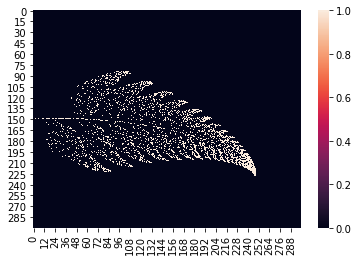

In [24]:
sns.heatmap(arr, vmin = 0, vmax = 1)

# Chaos
```
定常状態 : １点に収束、周期性、準周期的振動
過渡状態を経てこれらの状態に安定した状態をアトラクタという。
```

In [43]:
## ローレンツアトラクタ

def lorenz(x, y, z, s=10, r=28, b=8/3):
    x_dot=s*(y-x)
    y_dot=r*x - y - x*z
    z_dot=x*y - b*z
    return [x_dot, y_dot, z_dot]

dt = 1/100
xyz_ini=[0, 1, 1.05]
steps=2000

xs=np.empty(steps)
ys=np.empty(steps)
zs=np.empty(steps)
xs[0], ys[0], zs[0] = xyz_ini

for i in range(1, steps):
    xd, yd, zd = lorenz(xs[i - 1], ys[i - 1], zs[i - 1])
    xs[i] = xs[i - 1] + xd * dt
    ys[i] = ys[i - 1] + yd * dt
    zs[i] = zs[i - 1] + zd * dt

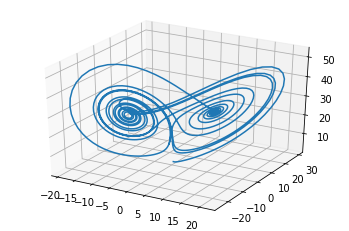

In [44]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(xs, ys, zs)

In [45]:
# ロジスティック方程式
# x(n+1) = a*x(n)(1 - x(n)) n=0,1,2,...
alpha = [1.25, 2.85, 3.1, 3.5, 3.7, 4]
num = 60
x0 = 0.01
xarr = np.zeros((6, num))

for i in range(len(alpha)):
    xarr[i, 0] = x0
    for k in range(num - 1):
        xarr[i, k + 1] = alpha[i] * xarr[i, k] * (1 - xarr[i, k])

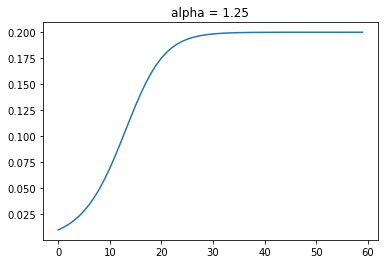

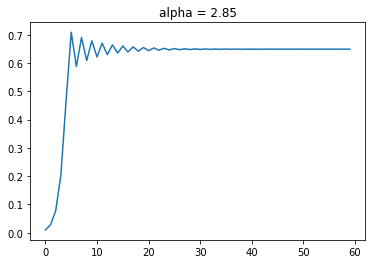

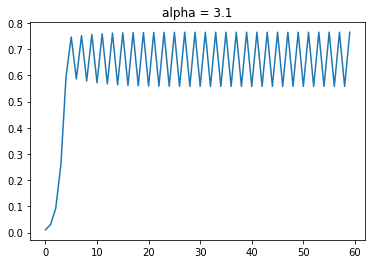

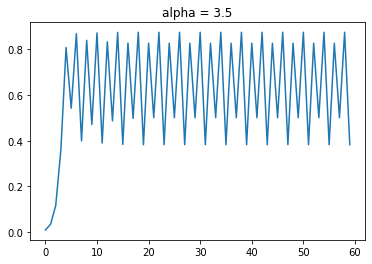

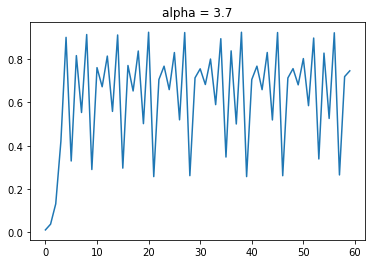

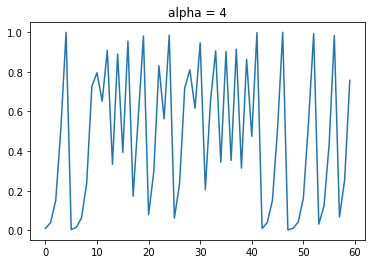

In [48]:
for i in range(len(alpha)):
    plt.title(f"alpha = {alpha[i]}")
    plt.plot(xarr[i, :])
    plt.show()

Text(0.5, 0, 'alpha')

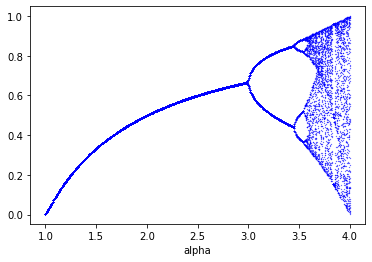

In [76]:
n = 200
npick = 50 # 系列のうち最後のnpick分をプロットする
for a in np.linspace(1, 4, 512):
    xs = np.zeros(n)
    xs[0] = 0.01
    for i in range(n - 1):
        xs[i + 1] = a * xs[i] * (1 - xs[i])
    # 収束しているなら、全て同じ位置にプロットされる＝１点のみプロットされる
    plt.plot([a]*npick, xs[-npick:], 'b.', markersize=0.5)

plt.xlabel('alpha')

In [36]:
# ウエダアトラクタ
# https://sites.google.com/site/cinderellajapan/cinderellade-kaosu/japanizu
k = 0.1
B = 12.0

step_per_sample=800
samples=5000
dt = 2*np.pi / step_per_sample

xs=np.zeros(samples)
ys=np.zeros(samples)
x, y = [0.2, 0.1]

for i in range(samples):
    for j in range(step_per_sample):
        t = j*dt
        xx = x + y*dt # x´ = y
        y_dot = -k*y - x**3 + B*np.cos(t)
        yy = y + y_dot*dt # y´ = -k*y - x^3 + B*cos(t)
        x = xx
        y = yy
    xs[i] = x
    ys[i] = y

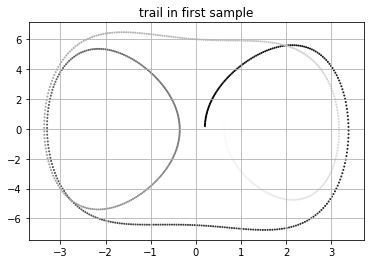

In [55]:
plt.title(f"trail in first sample")
gradient=[ i / len(xs) for i in range(1, len(xs)+1) ]
plt.scatter(xs, ys, s=1, c=gradient, cmap="gray")
plt.grid(True)

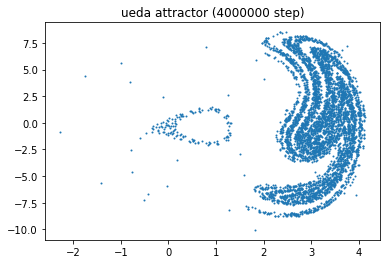

In [35]:
plt.title(f"ueda attractor ({samples*step_per_sampl} step)")
plt.scatter(xs, ys, s=1)